In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score

In [230]:
# Load dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')
print(df.head)

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [231]:
df.replace("unknown", pd.NA, inplace=True)

In [232]:
print(df.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


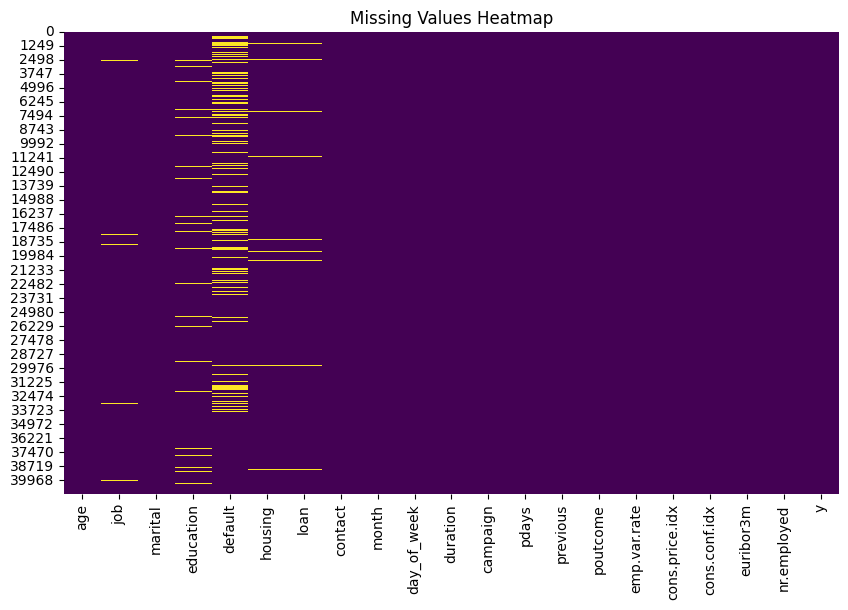

In [233]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

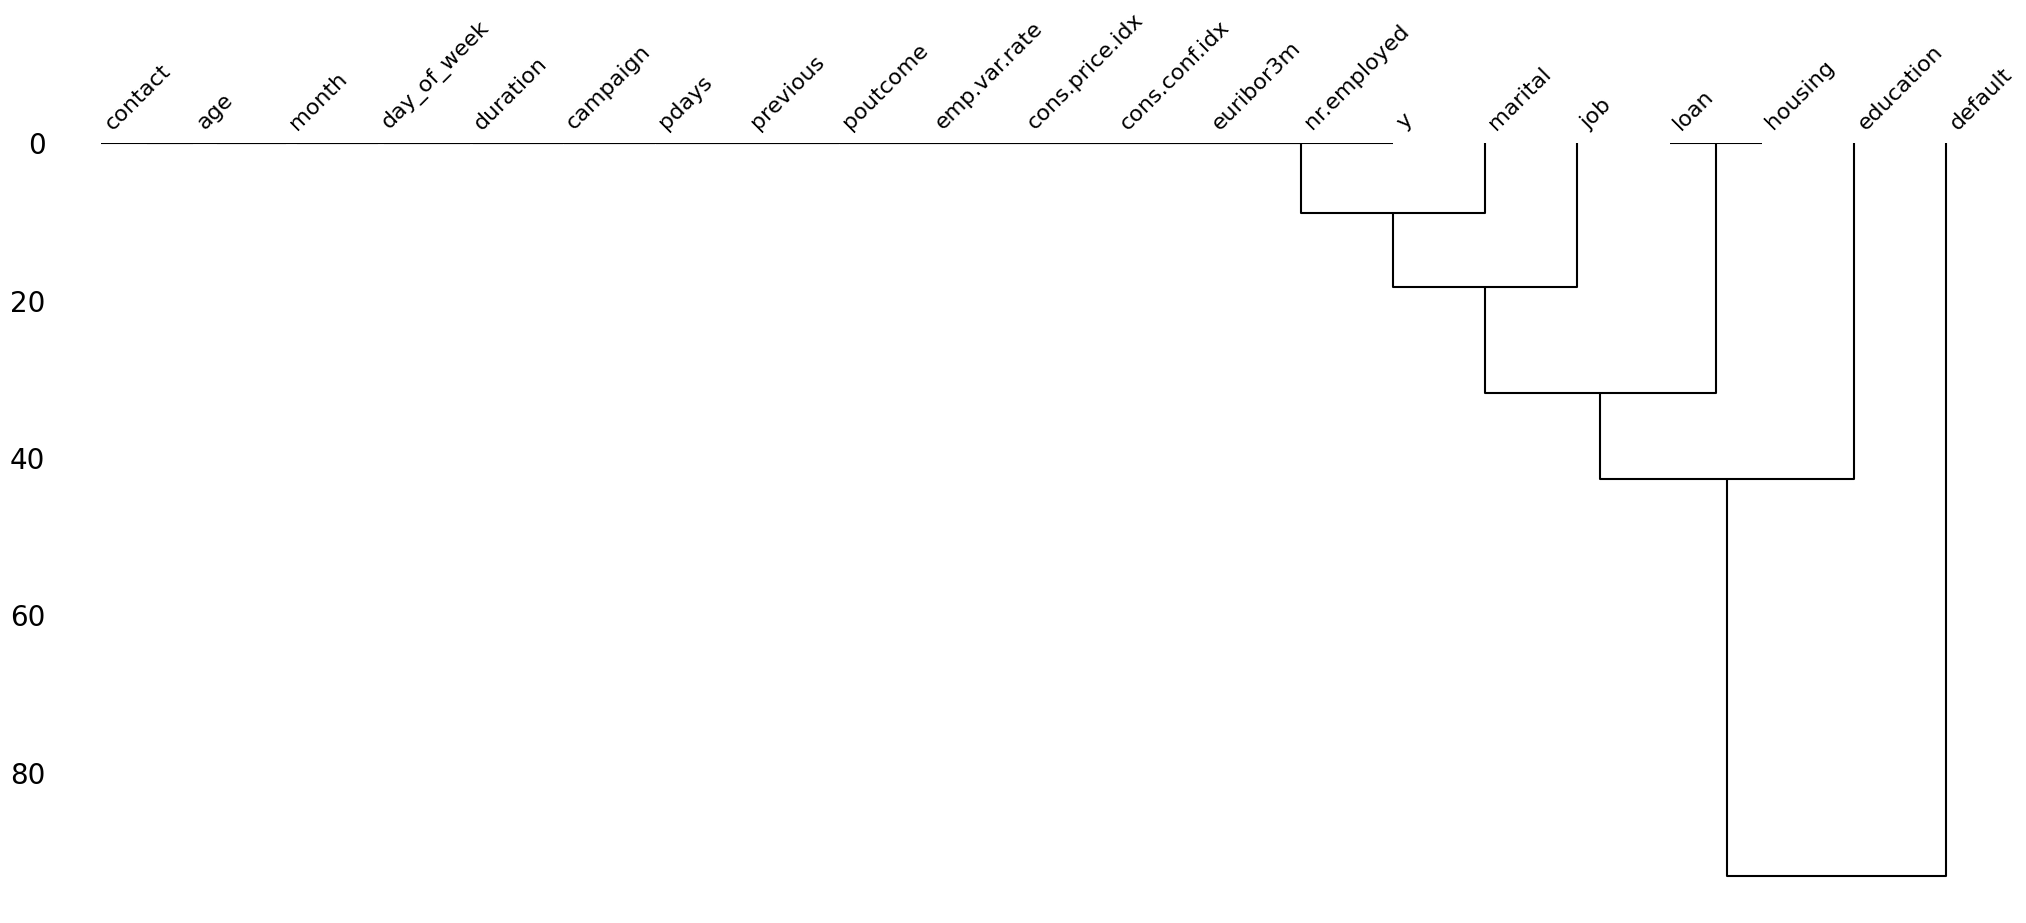

In [234]:
msno.dendrogram(df)
plt.show()

In [235]:
# Fill missing values for categorical columns with their mode
categorical_cols = ['education', 'default', 'housing', 'loan']
df = df.dropna(subset=['job', 'marital'])
# categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

<ipython-input-235-8d2a762f23ea>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-235-8d2a762f23ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mode_val, inplace=True)


In [236]:
# Confirm there are no more missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [237]:
# Convert categorical columns to 'category' type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

<ipython-input-237-c1296c65456c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-237-c1296c65456c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-237-c1296c65456c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

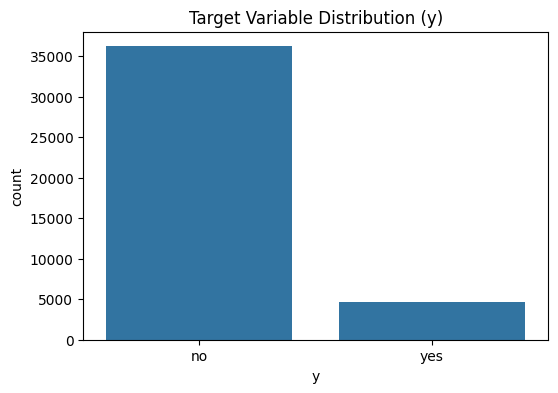

In [238]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution (y)')
plt.show()

In [239]:
# Encode categorical features
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='category').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

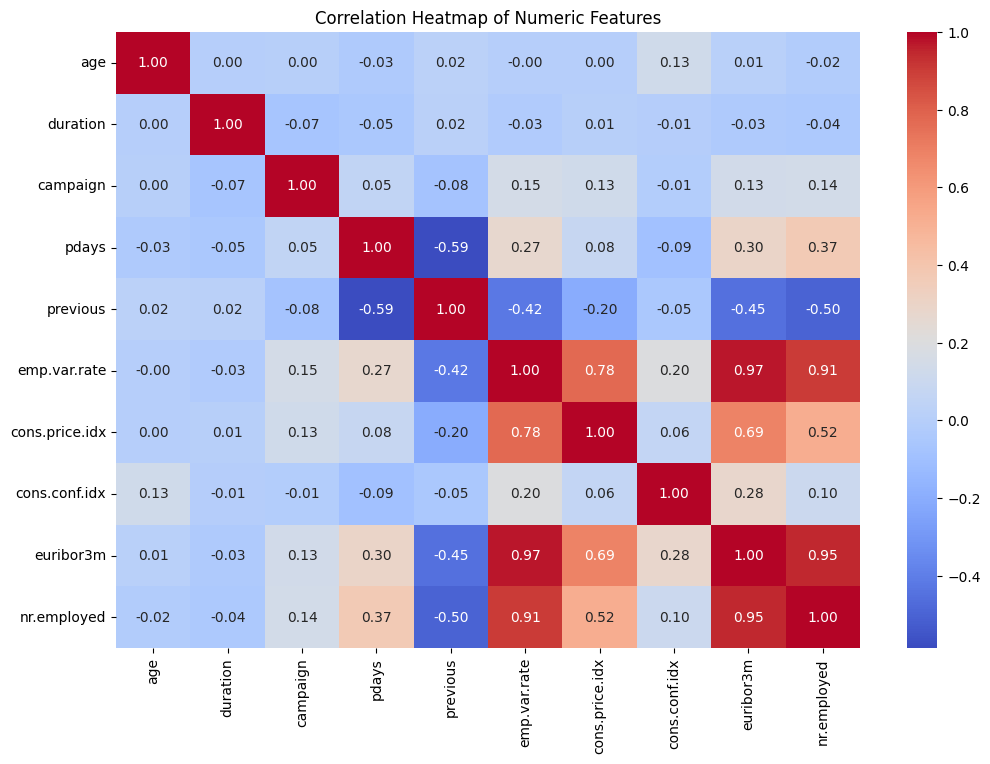

In [240]:
# Correlation heatmap of numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

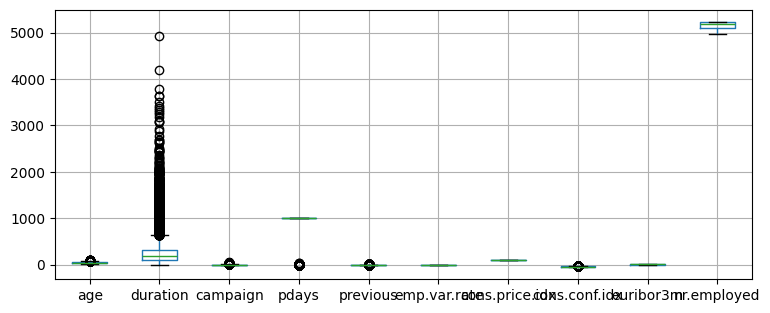

In [241]:
fig = plt.figure(figsize=(9, 3.5))
df.boxplot()
plt.show()

In [242]:
# features_to_plot = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']  # you can customize this list
features_to_plot = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate']  # you can customize this list
number_of_features = len(features_to_plot)

# Standardize features
X = df_encoded[features_to_plot].values
X_scaled = StandardScaler().fit_transform(X)

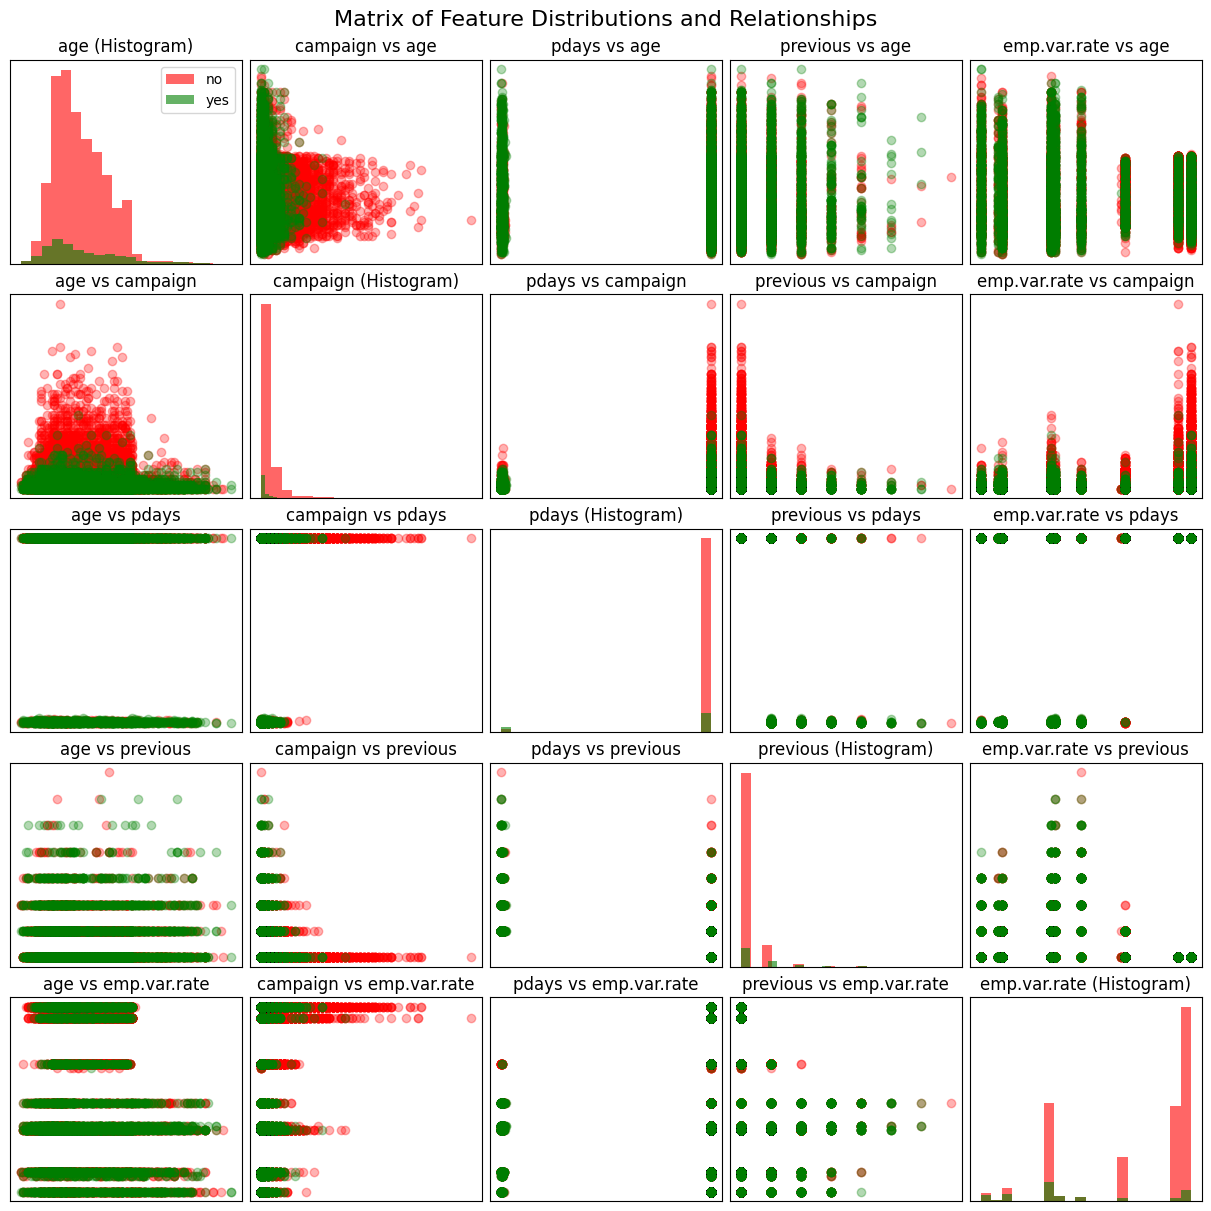

In [243]:
# Encode target
y_encoded = label_encoders['y'].transform(df['y'])  # 0 = no, 1 = yes

# Colors and labels
target_names = ['no', 'yes']
colors = ['red', 'green']

# Create plot matrix
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.subplots(nrows=number_of_features, ncols=number_of_features)

for i in range(number_of_features):
    for j in range(number_of_features):
        ax = plt.subplot(number_of_features, number_of_features, number_of_features*i + j + 1)
        if i == j:
            for color, label, target_name in zip(colors, [0, 1], target_names):
                ax.hist(X_scaled[y_encoded == label, i], alpha=0.6, color=color, label=target_name, bins=20)
            ax.set_title(f"{features_to_plot[i]} (Histogram)")
            if i == 0:
                ax.legend()
        else:
            for color, label in zip(colors, [0, 1]):
                ax.scatter(X_scaled[y_encoded == label, j], X_scaled[y_encoded == label, i], alpha=0.3, color=color)
            ax.set_title(f"{features_to_plot[j]} vs {features_to_plot[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.suptitle("Matrix of Feature Distributions and Relationships", fontsize=16)
plt.show()

In [244]:
df.groupby("contact")["y"].value_counts(normalize=True)

<ipython-input-244-a07f85414057>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("contact")["y"].value_counts(normalize=True)


contact    y  
cellular   no     0.852746
           yes    0.147254
telephone  no     0.947776
           yes    0.052224
Name: proportion, dtype: float64

In [245]:
# columns_to_drop = ['duration', 'contact' ,'nr.employed','euribor3m','day_of_week','month','previous']
columns_to_drop = ['duration', 'contact']

df.drop(columns=columns_to_drop, inplace=True)

In [246]:
# Split dataset into features and target
X = df_encoded.drop(columns='y')
y = df_encoded['y']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
# Initialize and train models
nb_model = GaussianNB()
lda_model = LDA()
qda_model = QDA()

nb_model.fit(X_train, y_train)
lda_model.fit(X_train, y_train)
qda_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)
lda_pred = lda_model.predict(X_test)
qda_pred = qda_model.predict(X_test)

# Accuracy scores
nb_acc = accuracy_score(y_test, nb_pred)
lda_acc = accuracy_score(y_test, lda_pred)
qda_acc = accuracy_score(y_test, qda_pred)

# Print results
print("Naïve Bayes Accuracy:", round(nb_acc * 100, 2), "%")
print("LDA Accuracy:", round(lda_acc * 100, 2), "%")
print("QDA Accuracy:", round(qda_acc * 100, 2), "%")


Naïve Bayes Accuracy: 83.38 %
LDA Accuracy: 90.82 %
QDA Accuracy: 88.76 %


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


- Naïve Bayes assumes:
1. All features are independent given the class. Even though this assumption is rarely true in real-world data, it still often performs well, especially on high-dimensional or moderately noisy data like this one.
2. It’s also quite robust to irrelevant features.
---
- LDA assumes:
1. The features are normally distributed.
2. Each class has the same covariance matrix.

LDA works well here likely because:
* I've encoded categorical features numerically (using label encoding), reducing noise.
* I scaled the numerical features.
---
- QDA assumes:
1. Features are normally distributed per class (same as LDA).
2. But unlike LDA, each class has its own covariance matrix. This introduces a lot more parameters to estimate.

QDA does not work well here likely because:
* The number of “yes” samples is much smaller than “no” (class imbalance), which leads QDA to overfit or estimate unstable covariance matrices for the minority class.
* Some features are highly correlated, and their covariance matrices can become:
Ill-conditioned (i.e., nearly singular) and Hard to invert (and QDA needs to invert them). This leads to numerical instability, poor generalization, and bad predictions.

When you remove highly correlated features:
* You reduce multicollinearity
* The covariance matrices become more stable